**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Mikaela Dobie<br/> 
Student Number: 300164161

# Exploratory Analysis

## Import important libraries

In [34]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [11]:

url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/01/glass.csv"
glassDB1 = pd.read_csv(url)

url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/02/dermatology_database_1.csv"
dermaDB2 = pd.read_csv(url)

url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
maternalDB3 = pd.read_csv(url)

url = "https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a1/04/car.data" 
carsDB4 = pd.read_csv(url,on_bad_lines='skip')

url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/05/WineQT.csv"
wineDB5 = pd.read_csv(url)

url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/06/16P.csv"
try:
    sixteenDB6 = pd.read_csv(url, encoding='ISO-8859-1') 
except UnicodeDecodeError:
    sixteenDB6 = pd.read_csv(url, encoding='ISO-8859-1', errors='replace')

url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/train.csv"
trainingDB7 = pd.read_csv(url)



C:\Users\mikae\AppData\Local\Temp\ipykernel_2716\2011932262.py:23: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  trainingDB7 = pd.read_csv(url)
C:\Users\mikae\AppData\Local\Temp\ipykernel_2716\2011932262.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = trainingDB7.applymap(lambda x: '____'  in str(x))


## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? ecifically, which attribute or attributes has missing values?

    1.2 Describe the methodology used for this investigation, and provide the rresponding code.

    1.1 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

In [12]:
# Your code goes here

#As not many rows are affected, the data still has integrity with out the rows with missing values
dermaDB2.drop(dermaDB2[dermaDB2['age'] == '?'].index, inplace=True)

mask = trainingDB7.map(lambda x: '____'  in str(x))

trainingDB7 = trainingDB7[~mask.any(axis=1)]


2. **Select and familiarize yourself with a classification task:** Choose one of the provided datasets for further investigation. It is advisable to select a dataset containing a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific application? Do you possess expertise in this particular domain of application?


**Classification**
    Chose Dataset 3 Maternal Health Risk Data Set. 
    The dataset is observed to be used to determine those at risk based on regular check up attributes.
    It is classified into risk levels based on health diagnostics, and is ideally meant for use in medical fields. 
    I have personally seen health databases such as epic and term identifiers using LLMs.

3. **Attribute Analysis**: 

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

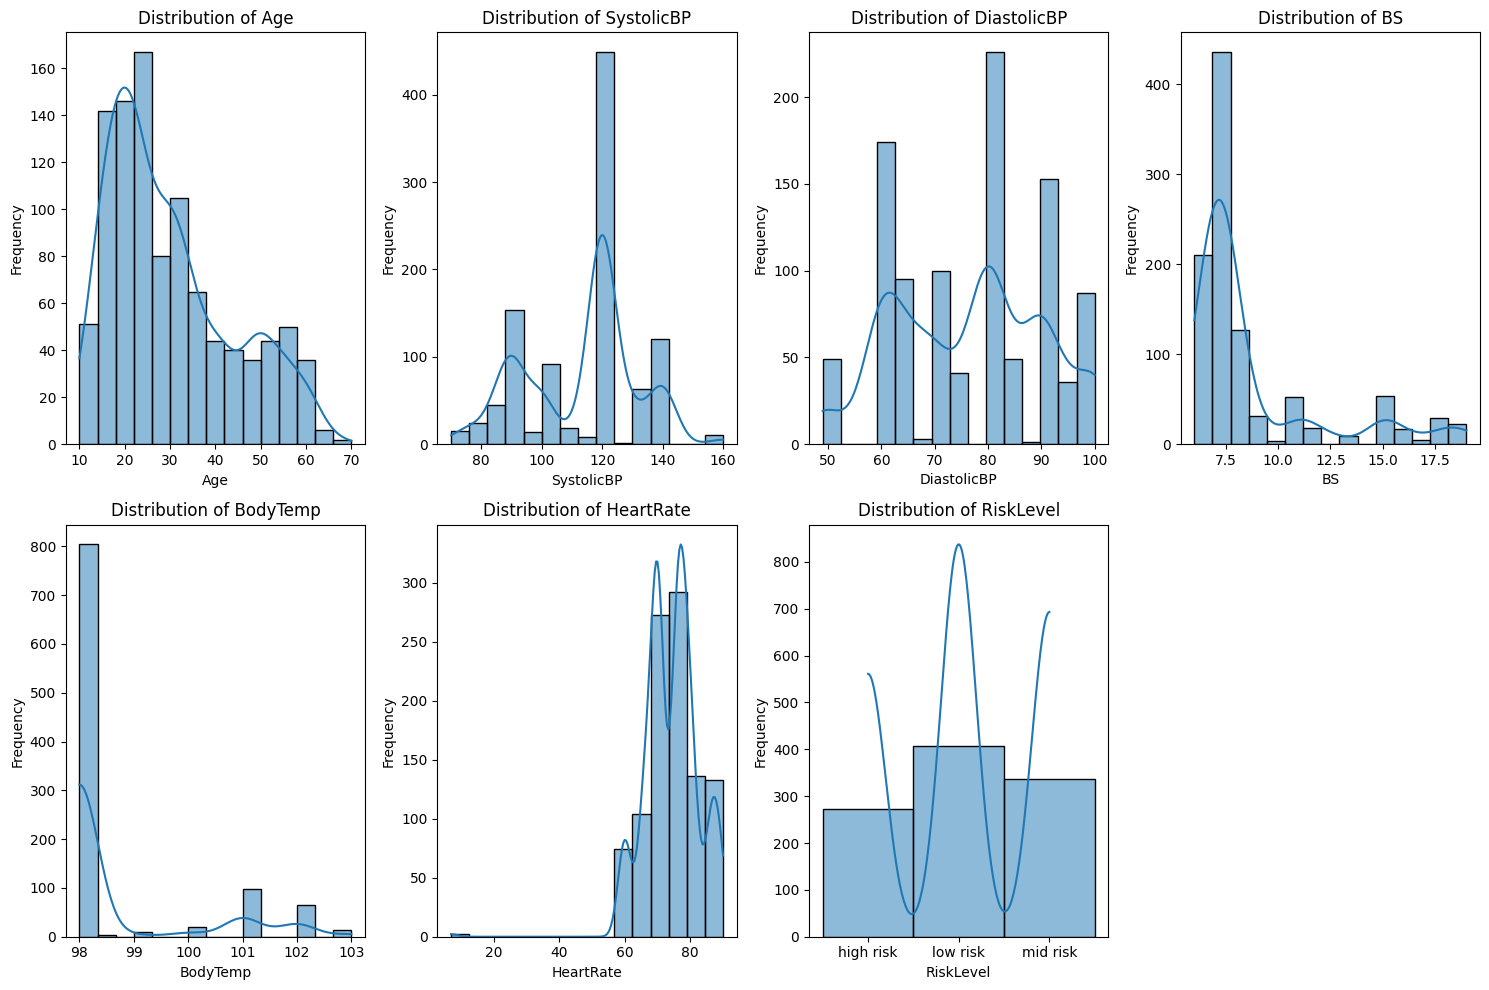

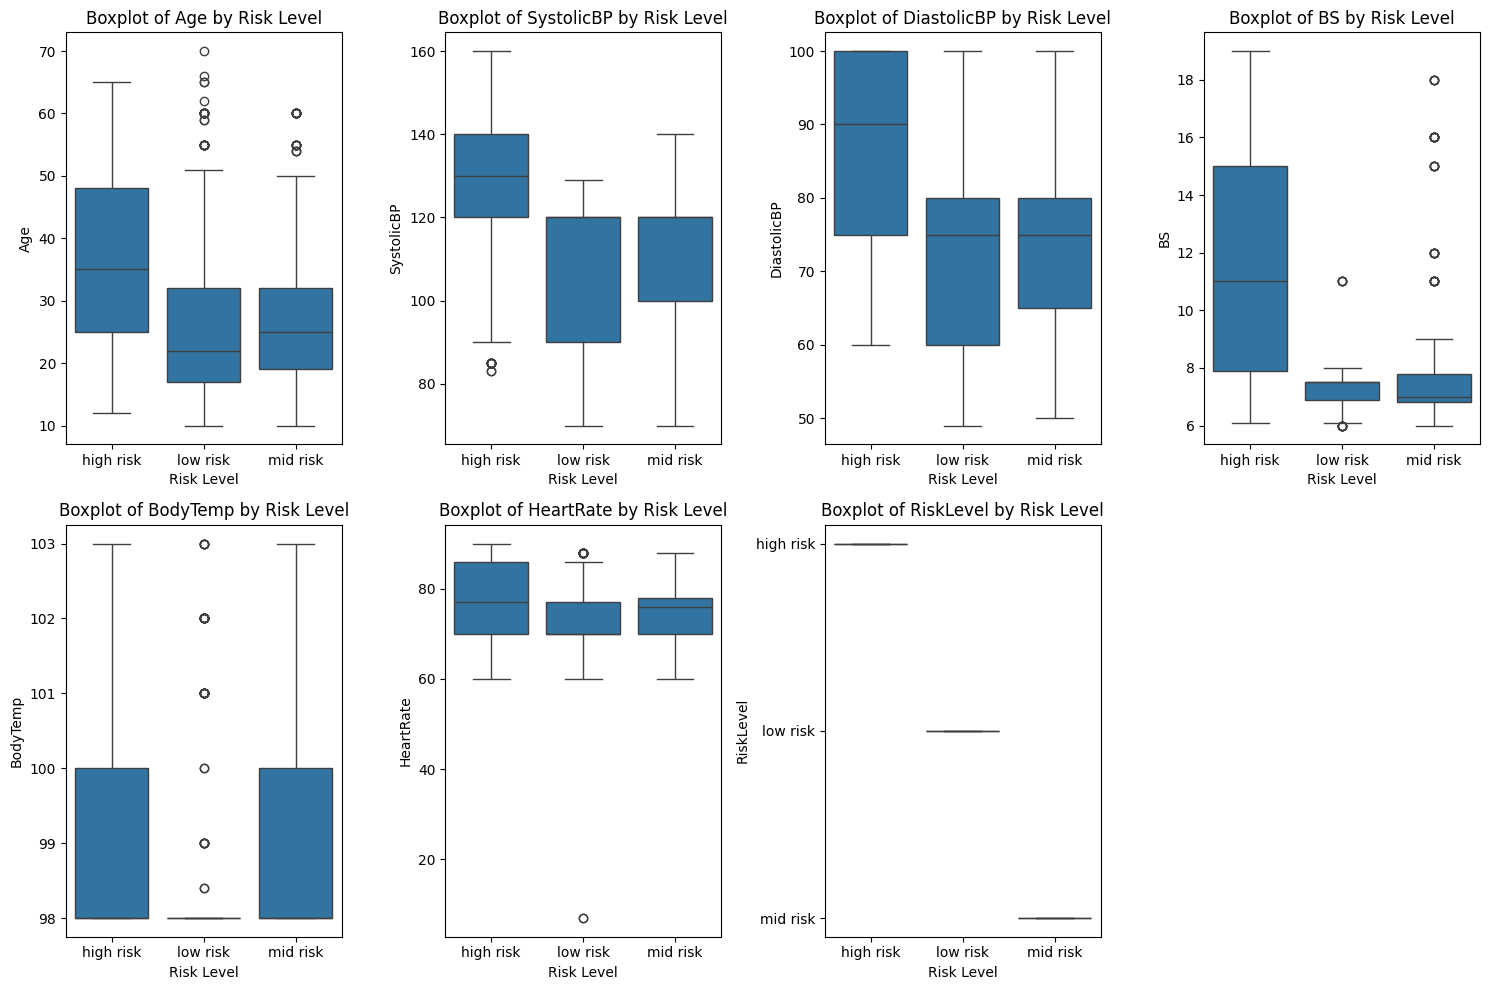

In [20]:
# Your code goes here
#As all the fields are symptoms that could change relatively quickly such as body temperature and heart rate
# All collumns should be considered in the ranking 


# Set up the plotting area
plt.figure(figsize=(15, 10))

# Histograms
for i, column in enumerate(maternalDB3.columns):
    plt.subplot(2, 4, i + 1)  
    sns.histplot(maternalDB3[column], bins=15, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(maternalDB3.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='RiskLevel', y=column, data=maternalDB3)
    plt.title(f'Boxplot of {column} by Risk Level')
    plt.xlabel('Risk Level')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#There is an outlier in HeartRate, however after looking at the rest of the data, heartrate does not really affect risk level 

4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

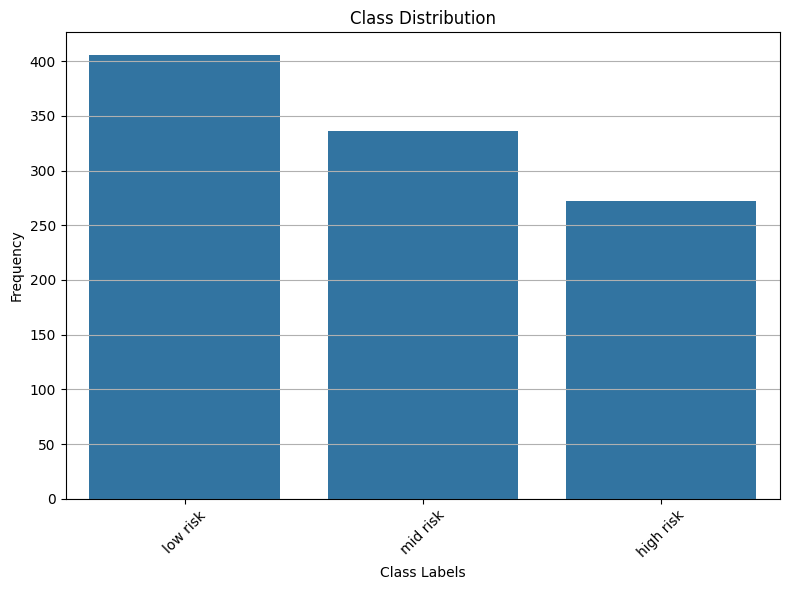

Class low risk: 406 instances (40.04%)
Class mid risk: 336 instances (33.14%)
Class high risk: 272 instances (26.82%)


In [22]:
# Your code goes here
# Count the frequency of each class label
class_distribution = maternalDB3['RiskLevel'].value_counts()

# Create a bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

# Assess whether the dataset is balanced or imbalanced
total_instances = maternalDB3.shape[0]
for label, count in class_distribution.items():
    percentage = (count / total_instances) * 100
    print(f'Class {label}: {count} instances ({percentage:.2f}%)')

#The data set is pretty balanced as there is no main outlier in the three values
#ie. all partitions are less than 50%

5. **Preprocessing**: 

    5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).

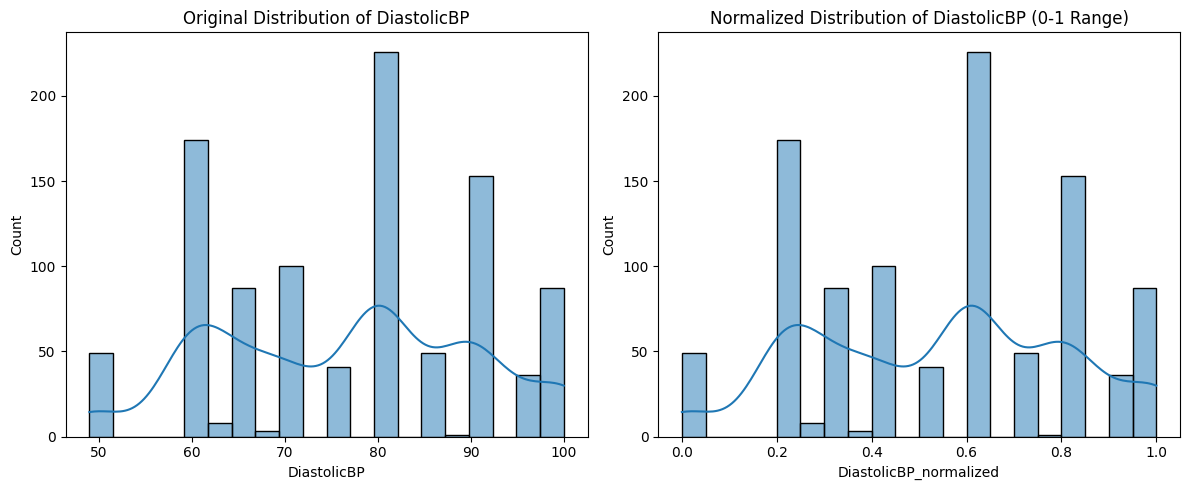

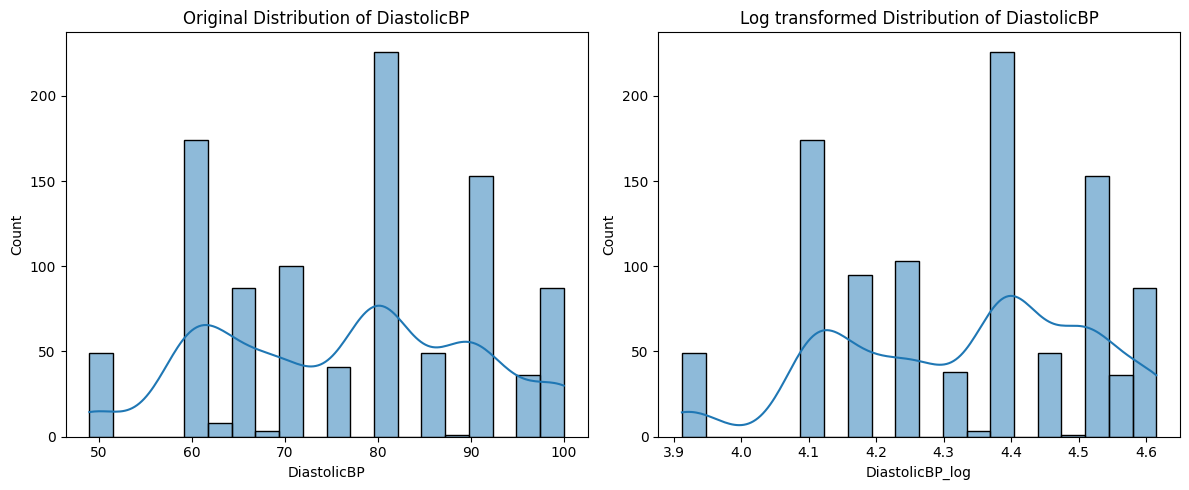

In [29]:
# Your code goes here
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(maternalDB3['DiastolicBP'], bins=20, kde=True)
plt.title('Original Distribution of DiastolicBP')

# 2. Apply Min-Max Normalization (Scaling feature1 between 0 and 1)
scaler = MinMaxScaler()
maternalDB3['DiastolicBP_normalized'] = scaler.fit_transform(maternalDB3[['DiastolicBP']])

# 3. Plot the normalized distribution
plt.subplot(1, 2, 2)
sns.histplot(maternalDB3['DiastolicBP_normalized'], bins=20, kde=True)
plt.title('Normalized Distribution of DiastolicBP (0-1 Range)')

plt.tight_layout()
plt.show()

# after attempting normalization, it can be seen that the bar graphs don't have a different view after normalizing

# 1. Plot original Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(maternalDB3['DiastolicBP'], bins=20, kde=True)
plt.title('Original Distribution of DiastolicBP')

# 2. Apply Log Scaler 
maternalDB3['DiastolicBP_log'] = np.log1p(maternalDB3['DiastolicBP'])

# 3. Plot the scaled distribution
plt.subplot(1, 2, 2)
sns.histplot(maternalDB3['DiastolicBP_log'], bins=20, kde=True)
plt.title('Log transformed Distribution of DiastolicBP')

plt.tight_layout()
plt.show()


In [32]:

# 1. Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# 2. Apply the encoder on the 'DiastolicBP' column
one_hot_encoded = encoder.fit_transform(maternalDB3[['RiskLevel']])

# 3. Convert the result to a DataFrame and merge with the original MaternalDB3
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['RiskLevel']))
maternalDB3_encoded = pd.concat([maternalDB3, one_hot_encoded_df], axis=1)

# Show the one-hot encoded Maternal Health DataFrame
print(maternalDB3_encoded.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0   25         130           80  15.0      98.0         86  high risk   
1   35         140           90  13.0      98.0         70  high risk   
2   29          90           70   8.0     100.0         80  high risk   
3   30         140           85   7.0      98.0         70  high risk   
4   35         120           60   6.1      98.0         76   low risk   

   BodyTemp_normalized  DiastolicBP_normalized  DiastolicBP_log  \
0                  0.0                0.607843         4.394449   
1                  0.0                0.803922         4.510860   
2                  0.4                0.411765         4.262680   
3                  0.0                0.705882         4.454347   
4                  0.0                0.215686         4.110874   

   RiskLevel_high risk  RiskLevel_low risk  RiskLevel_mid risk  
0                  1.0                 0.0                 0.0  
1                  1.0      

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [35]:
# Your code goes here
# after looking at the distribution, BodyTemp HeartRate are less important for determining riskLevel
X = maternalDB3[['Age', 'SystolicBP', 'DiastolicBP', 'BS']]
y = maternalDB3['RiskLevel']

7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [36]:
# Your code goes here



# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Output the size of each set
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)
print("Training Target Size:", y_train.shape)
print("Testing Target Size:", y_test.shape)

Training Set Size: (811, 4)
Testing Set Size: (203, 4)
Training Target Size: (811,)
Testing Target Size: (203,)


--------------------------------------------------------------------------

# References

Make sure you provide references to ALL sources used (articles, code, algorithms).

https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning
https://turcotte.xyz/teaching/csi-4106/

https://matplotlib.org/cheatsheets/cheatsheets.pdf

https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn


chat.openai.com
- Explain Numerical Feature Transformation
- Explain One Hot encoding


## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".